In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import tensorflow_datasets as tfds

train_ds, test_ds = tfds.load("kmnist", split=['train[:80%]','test[:20%]'],as_supervised=True)

train_images, train_labels = [], []
for image, label in train_ds:
    train_images.append(image.numpy())
    train_labels.append(label.numpy())

test_images, test_labels = [], []
for image, label in test_ds:
    test_images.append(image.numpy())
    test_labels.append(label.numpy())

train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Normalize and flatten the data
train_images = train_images.reshape(-1, 28*28) / 255.0
test_images = test_images.reshape(-1, 28*28) / 255.0

#RBF Gaussian function
def rbf(x, center, sigma=1.0):
    return np.exp(-np.linalg.norm(x - center) ** 2 / (2 * sigma ** 2))

#the RBF Network class
class RBFNetwork:
    def __init__(self, num_rbf_units, num_classes):
        self.num_rbf_units = num_rbf_units
        self.num_classes = num_classes
        self.centers = None
        self.weights = None
        self.sigma = None

    # Training the network using K-means for centers and gradient descent for weights
    def fit(self, X, y, learning_rate=0.01, epochs=100):
        kmeans = KMeans(n_clusters=self.num_rbf_units)
        kmeans.fit(X)
        self.centers = kmeans.cluster_centers_

        self.weights = np.random.randn(self.num_rbf_units, self.num_classes)

        d_max = np.max([np.linalg.norm(c1 - c2) for c1 in self.centers for c2 in self.centers])
        self.sigma = d_max / np.sqrt(2 * self.num_rbf_units)

        y_one_hot = np.eye(self.num_classes)[y]

        for epoch in range(epochs):
            G = np.zeros((X.shape[0], self.num_rbf_units))
            for i, x in enumerate(X):
                for j, c in enumerate(self.centers):
                    G[i, j] = rbf(x, c, self.sigma)

            # Forward pass (softmax)
            output = self.softmax(np.dot(G, self.weights))

            # Backpropagation (gradient descent)
            error = output - y_one_hot
            self.weights -= learning_rate * np.dot(G.T, error)

            if epoch % 10 == 0:
                loss = np.mean(np.square(error))
                print(f'Epoch {epoch}, Loss: {loss}')

    def predict(self, X):
        G = np.zeros((X.shape[0], self.num_rbf_units))
        for i, x in enumerate(X):
            for j, c in enumerate(self.centers):
                G[i, j] = rbf(x, c, self.sigma)

        output = self.softmax(np.dot(G, self.weights))
        return np.argmax(output, axis=1)

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

num_rbf_units = 100
num_classes = 10
rbf_network = RBFNetwork(num_rbf_units=num_rbf_units, num_classes=num_classes)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/incomplete.Y7MUB6_3.0.1/kmnist-train.tfrecord*...:   0%|          |…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/kmnist/incomplete.Y7MUB6_3.0.1/kmnist-test.tfrecord*...:   0%|          | …

Dataset kmnist downloaded and prepared to /root/tensorflow_datasets/kmnist/3.0.1. Subsequent calls will reuse this data.


In [4]:
# Train the model
rbf_network.fit(train_images, train_labels, learning_rate=0.01, epochs=100)

# Make predictions
y_pred = rbf_network.predict(test_images)

Epoch 0, Loss: 0.09000000505240671
Epoch 10, Loss: 0.0900000050416999
Epoch 20, Loss: 0.09000000503099306
Epoch 30, Loss: 0.09000000502028621
Epoch 40, Loss: 0.0900000050095794
Epoch 50, Loss: 0.09000000499887253
Epoch 60, Loss: 0.0900000049881657
Epoch 70, Loss: 0.09000000497745884
Epoch 80, Loss: 0.09000000496675198
Epoch 90, Loss: 0.09000000495604511


In [7]:
# Evaluate the model
accuracy = accuracy_score(test_labels, y_pred)
print(f'Accuracy: {accuracy}%')

Accuracy: 0.086%


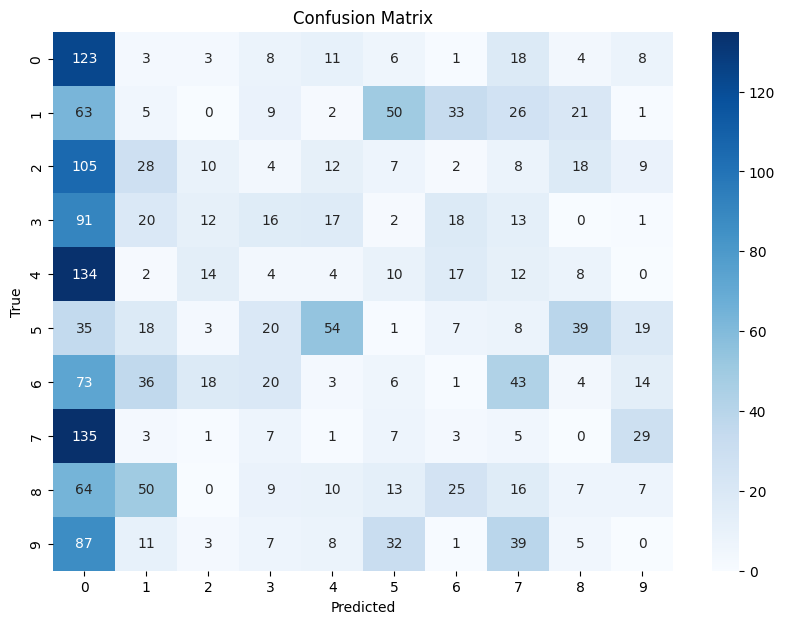

In [8]:
# Confusion matrix
conf_matrix = confusion_matrix(test_labels, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Strengths of the RBF Network:**

The use of localized Gaussian basis functions makes RBF networks good for handling classification tasks where data clusters are spatially distinct.
The K-means clustering approach for determining RBF centers is a natural way to capture the structure of the dataset.

**Limitations:**

RBF networks can be computationally expensive, especially with a high number of RBF units.
Finding the optimal number of RBF units and the right sigma can be challenging.
Performance is sensitive to the choice of hyperparameters like the number of RBF units and the learning rate.

**Effect of the number of RBF units:**

Too few RBF units can result in underfitting, while too many can lead to overfitting.
You can experiment with different values of k (RBF units) to observe the impact on performance.